In [1]:
pwd

'C:\\Users\\MTB^08'

In [3]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv('heart_disease.csv')

# Step 3: Get the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Step 4: Display the first few rows (head)
print("\nHead of the DataFrame:")
print(df.head())

# Step 5: Display the last few rows (tail)
print("\nTail of the DataFrame:")
print(df.tail())

Shape of the DataFrame: (10000, 21)

Head of the DataFrame:
    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption S

    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No           

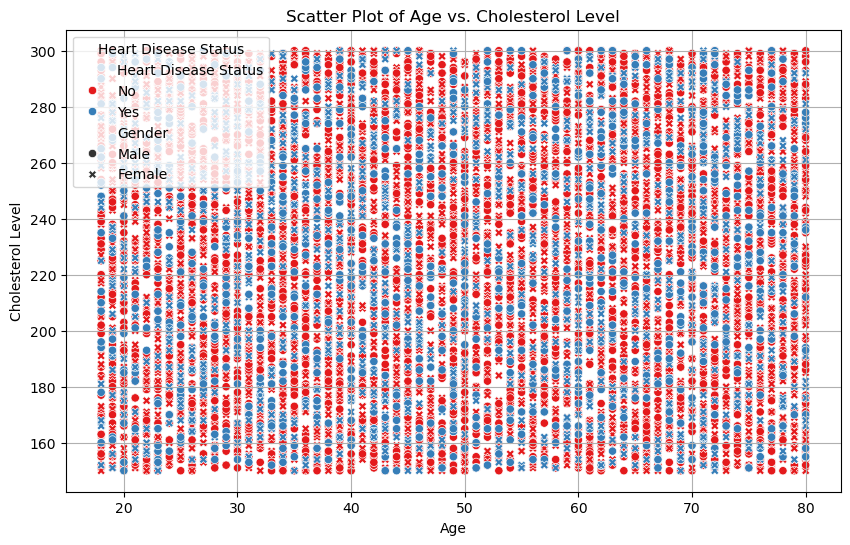

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv('heart_disease.csv')

# Step 3: Display the first few rows of the dataset
print(df.head())

# Step 4: Basic data analysis
# Check for null values
print(df.isnull().sum())
# Describe the data
print(df.describe())

# Step 5: Create a scatter plot
# Scatter plot of Age vs. Cholesterol Level, colored by Heart Disease Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Cholesterol Level', hue='Heart Disease Status', style='Gender', palette='Set1')
plt.title('Scatter Plot of Age vs. Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.legend(title='Heart Disease Status')
plt.grid()
plt.show()

    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No           

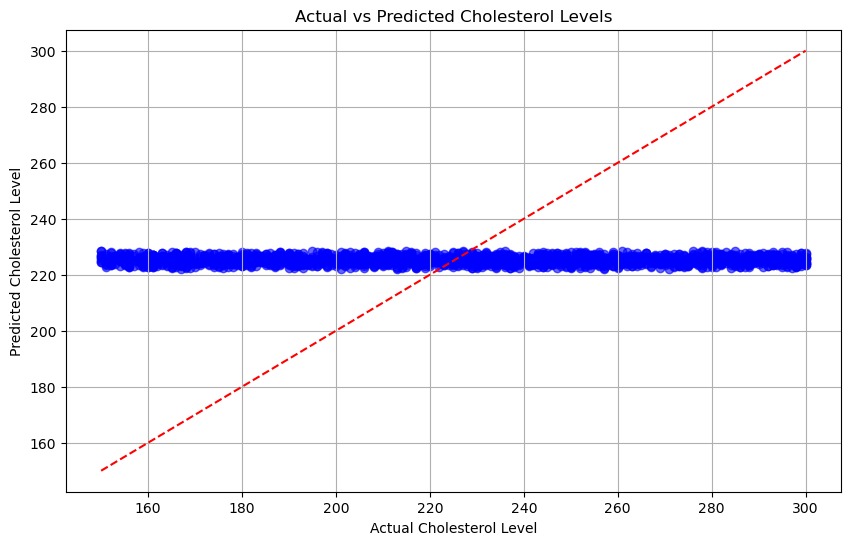

In [6]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Load the dataset
df = pd.read_csv('heart_disease.csv')

# Step 3: Display the first few rows of the dataset
print(df.head())

# Step 4: Define features and target variable
X = df[['Age', 'BMI']]  # Features
y = df['Cholesterol Level']  # Target variable

# Step 5: Handle missing values in features and target
imputer_X = SimpleImputer(strategy='mean')  # For features
X_imputed = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='mean')  # For target
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Step 7: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Step 10: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Cholesterol Level')
plt.ylabel('Predicted Cholesterol Level')
plt.title('Actual vs Predicted Cholesterol Levels')
plt.grid()
plt.show()

Accuracy: 0.81


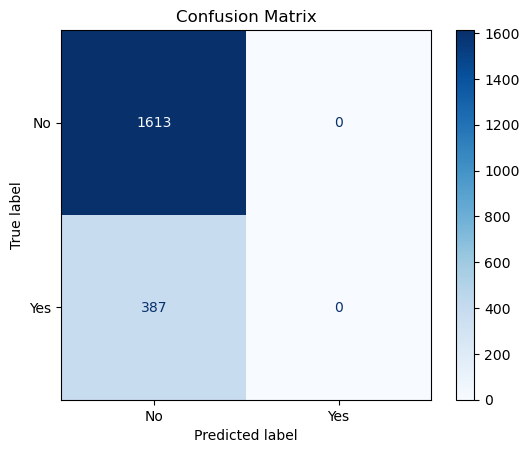

In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Step 2: Load the dataset
df = pd.read_csv('heart_disease.csv')

# Step 3: Define features and target variable
X = df[['Age', 'BMI', 'Blood Pressure', 'Cholesterol Level']]  # Features
y = df['Heart Disease Status'].map({'Yes': 1, 'No': 0})  # Binary target variable

# Step 4: Handle missing values
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 6: Train a classification model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 9: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])

# Step 10: Display confusion matrix
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [8]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


C:\Users\MTB^08\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [21:35:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.79


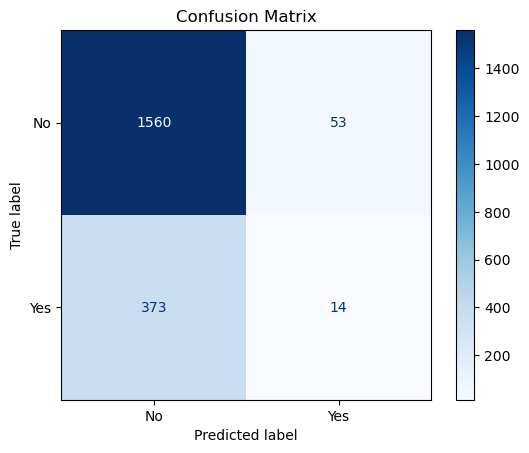

In [9]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb

# Step 2: Load the dataset
df = pd.read_csv('heart_disease.csv')

# Step 3: Define features and target variable
X = df[['Age', 'BMI', 'Blood Pressure', 'Cholesterol Level']]  # Features
y = df['Heart Disease Status'].map({'Yes': 1, 'No': 0})  # Binary target variable

# Step 4: Handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 6: Train an XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 9: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])

# Step 10: Display confusion matrix
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()